In [3]:
#Importing all the Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf

In [4]:
my_data_dir = "D://driving_dataset/"

In [5]:
os.listdir(my_data_dir)[-2]

'9999.jpg'

In [6]:
cell = my_data_dir+'500.jpg'

In [7]:
img= imread(cell)

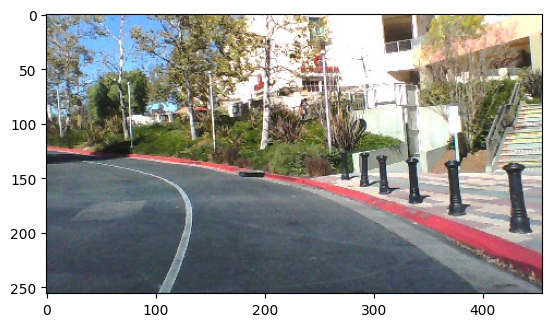

In [8]:
plt.imshow(img)

In [7]:
img.shape

(256, 455, 3)

In [8]:
#Finding the shape of the every image and appending it to a list to find the average width and height of all the images
dim1 = []
dim2 = []
for image_filename in os.listdir(my_data_dir)[:-1]:
    
    img = imread(my_data_dir+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [9]:
np.mean(dim1)

256.0

In [10]:
np.mean(dim2)

455.0

In [11]:
img_shape = (256,455,3)

In [17]:
import cv2
import random
import numpy as np

xs = []
ys = []

with open("D://driving_dataset/data.txt") as f:
    for line in f:
        xs.append("D://driving_dataset/" + line.split()[0])
        ys.append(float(line.split()[1]) * 3.14159265 / 180)
        
print(xs[500],ys[500])

D://driving_dataset/500.jpg -1.7318902147750004


--> Converting the lables from degrees to Radians

In [12]:
num_images = len(xs)
num_images

45406

In [13]:
c = list(zip(xs, ys))
random.shuffle(c)
xs, ys = zip(*c)

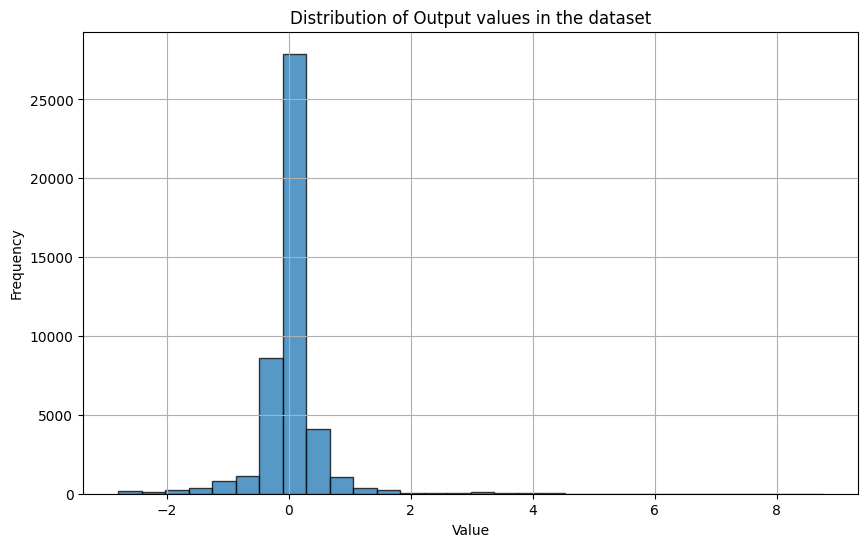

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(ys, bins=30, edgecolor='black', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Output values in the dataset')
plt.grid(True)
plt.show()

In [15]:
X = []
y = []

def norm_array(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize((cv2.cvtColor(image, cv2.COLOR_RGB2HSV))[:, :, 1], (200, 66))
    image = image/255.0
    return image
    
    
for i in range(0,len(xs)):
    X.append(norm_array(xs[i]))
    y.append(ys[i])

This norm_array function involved

--> Reading the path of image

--> Applying satuaration to image(taking all the elements of image and converting the rgb image to red) and resizing the image to (200,66)

-->Normalizing the image by dividing with 255.

-->Returning the image

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_model(learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(filters=24,kernel_size=(5,5),strides=(2,2),activation='relu',padding='valid',input_shape=(200,66,1)))
    model.add(Conv2D(filters=36,kernel_size=(5,5),strides=(2,2),activation='relu',padding='valid'))
    model.add(Conv2D(filters=48,kernel_size=(5,5),strides=(2,2),activation='relu',padding='valid'))
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='valid'))
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='valid'))


    model.add(Flatten())

    model.add(Dense(units=1152,activation='relu'))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=100,activation='relu'))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=50,activation='relu'))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=10,activation='relu'))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=1,activation='linear'))


    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learning_rate))
    
    return model
model = create_model(learning_rate=0.0001)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 31, 24)        624       
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 14, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 5, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 3, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 1, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 1152)              1

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=84)

X_train=np.array(X_train)
X_val=np.array(X_val)
y_train=np.array(y_train)
y_val=np.array(y_val)


X_train = X_train.reshape(X_train.shape[0], 200, 66, 1)
X_val = X_val.reshape(X_val.shape[0], 200, 66, 1)

In [19]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


model = KerasRegressor(build_fn=create_model, verbose=0)

param_grid = {'learning_rate': [0.001, 0.01, 0.1,0.0001,0.00001]}


grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding mean squared error
print("Best Mean Squared Error:", -grid_result.best_score_)
print("Best Hyperparameters:", grid_result.best_params_)

C:\Users\Dilee\AppData\Local\Temp\ipykernel_23504\3676137007.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best Mean Squared Error: 0.28548333048820496
Best Hyperparameters: {'learning_rate': 0.0001}


In [19]:
model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=60,batch_size=96)

Epoch 1/60
379/379 [==============================] - 72s 186ms/step - loss: 0.2909 - val_loss: 0.2889
Epoch 2/60
379/379 [==============================] - 64s 170ms/step - loss: 0.2834 - val_loss: 0.2676
Epoch 3/60
379/379 [==============================] - 65s 172ms/step - loss: 0.2671 - val_loss: 0.2467
Epoch 4/60
379/379 [==============================] - 65s 171ms/step - loss: 0.2461 - val_loss: 0.2255
Epoch 5/60
379/379 [==============================] - 65s 171ms/step - loss: 0.2210 - val_loss: 0.1967
Epoch 6/60
379/379 [==============================] - 66s 174ms/step - loss: 0.1977 - val_loss: 0.1586
Epoch 7/60
379/379 [==============================] - 67s 176ms/step - loss: 0.1838 - val_loss: 0.1473
Epoch 8/60
379/379 [==============================] - 69s 182ms/step - loss: 0.1663 - val_loss: 0.1371
Epoch 9/60
379/379 [==============================] - 64s 169ms/step - loss: 0.1589 - val_loss: 0.1145
Epoch 10/60
379/379 [==============================] - 64s 169ms/step - l

#### Model Evaluation

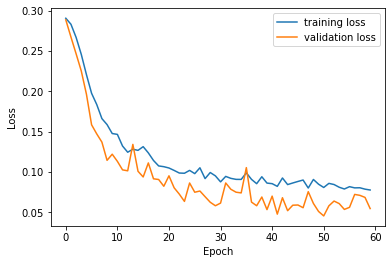

In [20]:
model.history.history

plt.plot(model.history.history['loss'], label='training loss')
plt.plot(model.history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [21]:
print(np.mean(y_train),np.mean(y_val))

0.032331436353835626 0.022960131058737062


In [22]:
pred = model.predict(X_val)

284/284 [==============================] - 5s 17ms/step


In [23]:
pred

array([[ 0.618882  ],
       [ 0.04299912],
       [ 0.02939598],
       ...,
       [ 0.1456594 ],
       [-0.01409905],
       [ 0.2942769 ]], dtype=float32)

In [57]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true and y_pred are the true and predicted regression targets, respectively
absolute_errors = np.abs(y_val - pred)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_val, pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared score (coefficient of determination)
r2 = r2_score(y_val, pred)
print("R-squared Score (R2):", r2)


Mean Absolute Error (MAE): 0.09749617313105065
Mean Squared Error (MSE): 0.05460626254921818
Root Mean Squared Error (RMSE): 0.23367982914496102
R-squared Score (R2): 0.8134480464190376


#### Finding the relation between Predicted and True values

--> If the best fit curve comes out to be linear then the model performed well

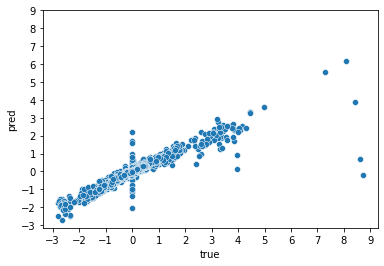

In [26]:
sns.scatterplot(x=df['true'],y=df['pred'],data=df)
x_t = [-3,-2,-1,0,1,2,3,4,5,6,7,8,9]
y_t = [-3,-2,-1,0,1,2,3,4,5,6,7,8,9]
plt.xticks(x_t)
plt.yticks(y_t)
plt.show()

--> The graph looks linear in most of the cases but there are some outliers where the true value is zero but the predcited ones 
    are not the zeros(only in some cases and are very less in number)
    
--> So the model performed good

### Testing the model with the real world data

-->The predicted angle is in Degrees.

-->Negative value represents that steering angle should be rotated in Anti-clockwise Direction

-->Positive Value represents that steering angle should be rotated in Clockwise Direction

In [10]:
real_world_images = "D://ai_autopilot/real_world_img_testing/"

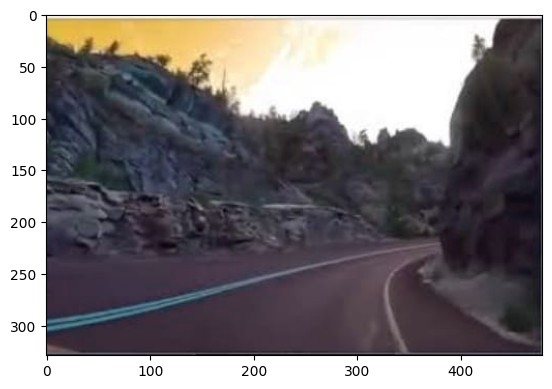

1/1 [==============================] - 0s 469ms/step
The predicted angle is [14.116706]


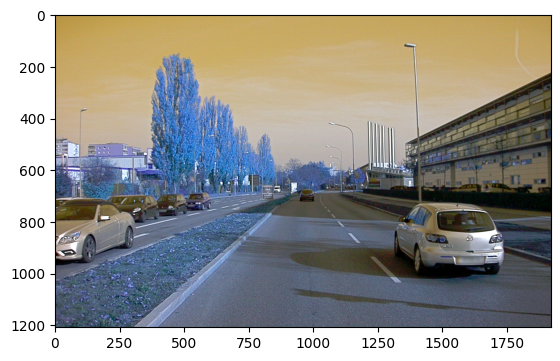

1/1 [==============================] - 0s 53ms/step
The predicted angle is [0.05373139]


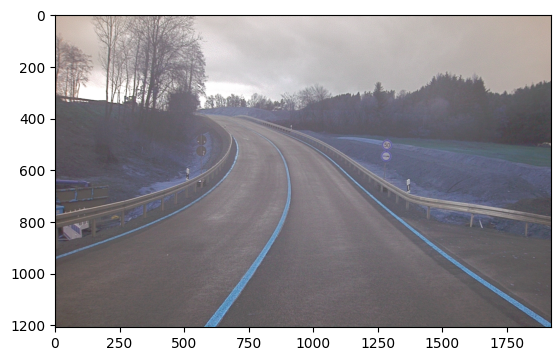

1/1 [==============================] - 0s 40ms/step
The predicted angle is [-6.0833926]


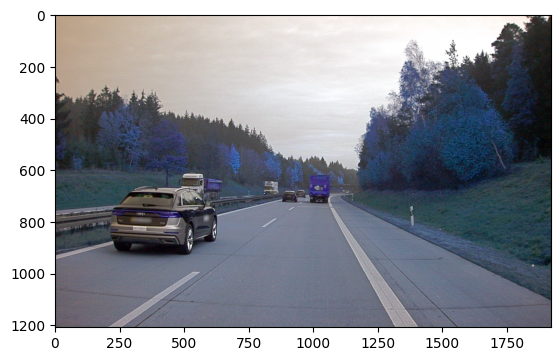

1/1 [==============================] - 0s 71ms/step
The predicted angle is [0.21004497]


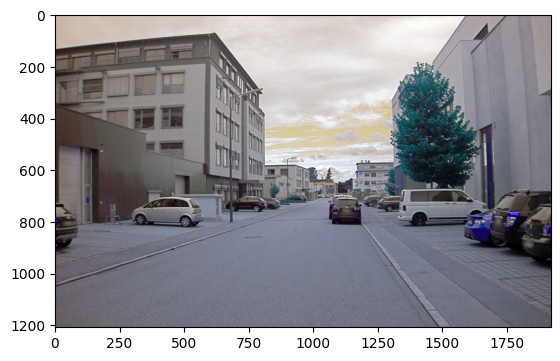

1/1 [==============================] - 0s 48ms/step
The predicted angle is [1.514907]


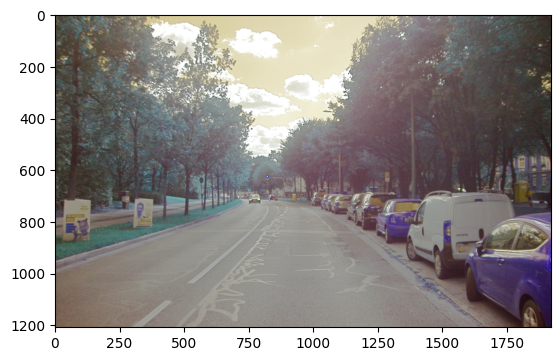

1/1 [==============================] - 0s 53ms/step
The predicted angle is [-21.86499]
None


In [13]:
def real_world_img(real_world_img):
    for filename in os.listdir(real_world_images):
        image = real_world_images+filename
        image = cv2.imread(image)
        plt.imshow(image)
        plt.show()
        image = cv2.resize((cv2.cvtColor(image, cv2.COLOR_RGB2HSV))[:, :, 1], (200, 66))
        image = image/255.0
        image = np.expand_dims(image, axis=0)
        image = image.reshape(image.shape[0], 200, 66, 1)
        print("The predicted angle is",list(model.predict(image)*(180/3.14159265))[0])
print(real_world_img(real_world_img))

#### Saving the Model

In [33]:
model.save("Saved_Model.h5")